In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('abalone.csv')

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.025,5
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.035,6
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.040,5
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.048,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [6]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<AxesSubplot:xlabel='Rings', ylabel='Height'>

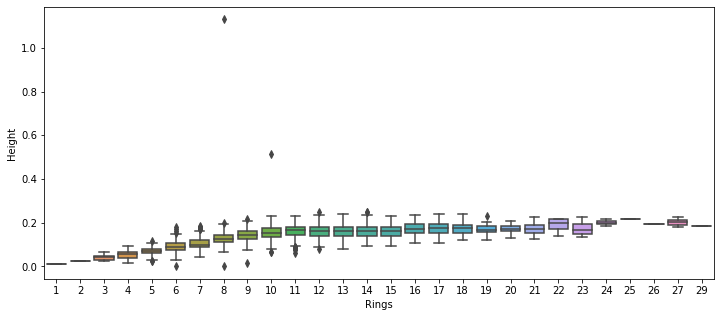

In [13]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Rings',y='Height')


<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

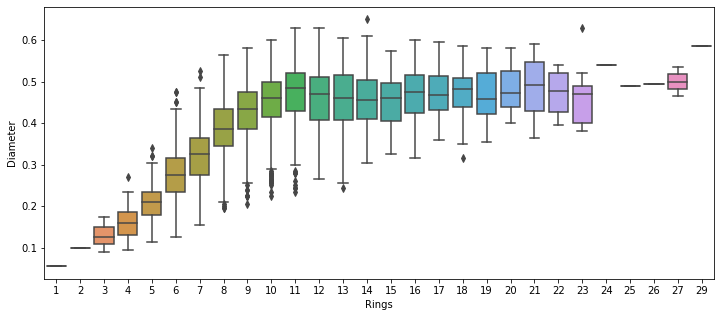

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Rings',y='Diameter')

<AxesSubplot:xlabel='Rings', ylabel='Length'>

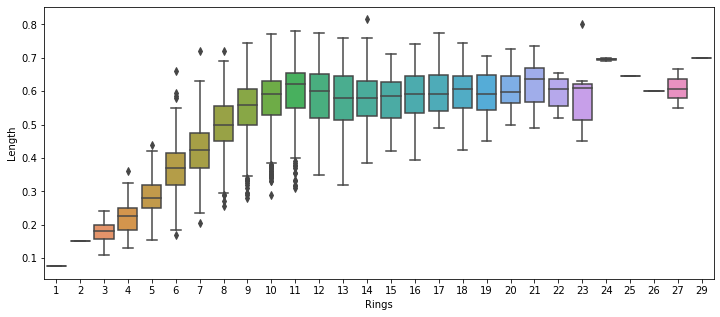

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Rings',y='Length')

<AxesSubplot:>

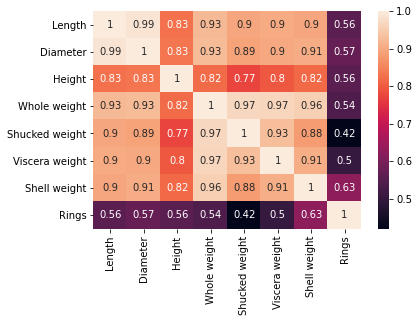

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']].mean().sort_values('Rings')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304


In [18]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


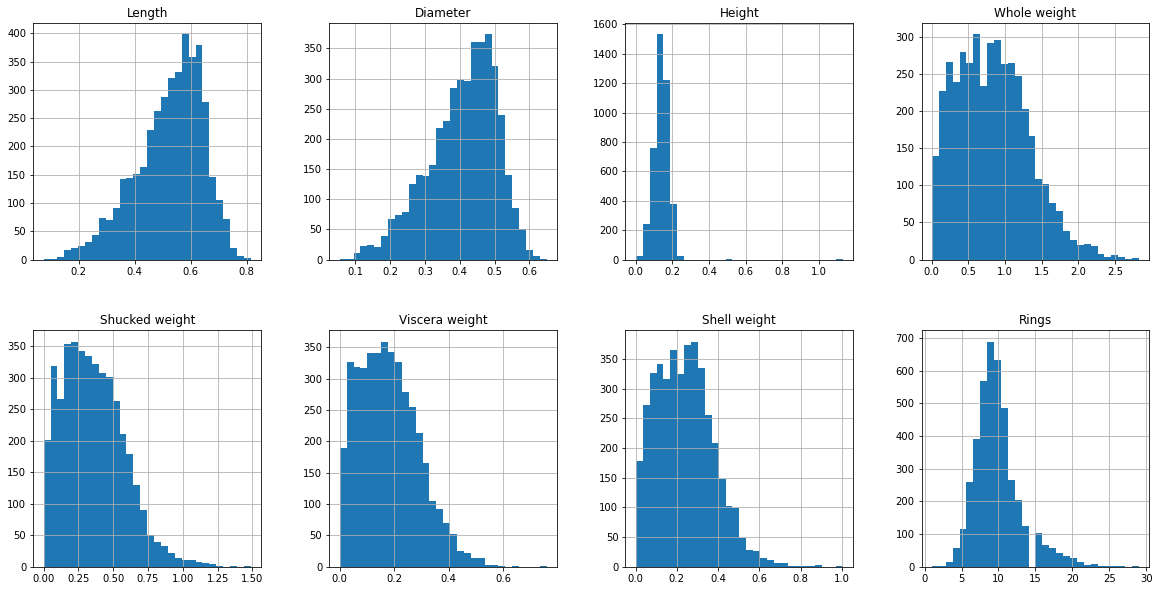

In [19]:

df.hist(figsize=(20,10),bins=30 , layout=(2,4))
plt.show()

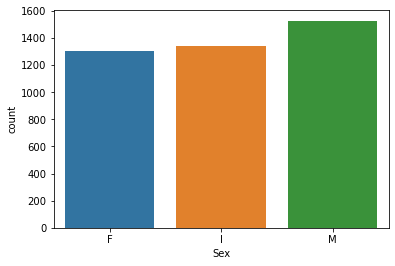

In [20]:
sns.countplot(x='Sex',data=df)
plt.show()

In [21]:
missing_values=x.isnull().sum().sort_values(ascending=False)
missing_percentage=(missing_values/len(df))*100
pd.concat([missing_values,missing_percentage],axis=1,keys=['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0


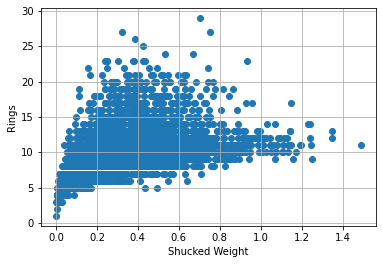

In [22]:
plt.scatter(x='Shucked weight',data=df,y='Rings')
plt.xlabel('Shucked Weight')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [23]:
df.drop(df[(df['Shucked weight']>=1.0)&(df.Rings<=20)].index,inplace=True,axis=0)
df.drop(df[(df['Shucked weight']<1) & (df['Rings'] > 20)].index,inplace=True,axis=0)

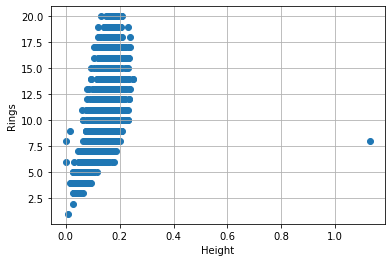

In [24]:
plt.scatter(x='Height',data=df,y='Rings')
plt.xlabel('Height')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [25]:
df.drop(df[(df['Height']>0.4)&(df.Rings<20)].index,inplace=True,axis=0)
df.drop(df[(df['Height']==0)&(df.Rings<20)].index,inplace=True,axis=0)

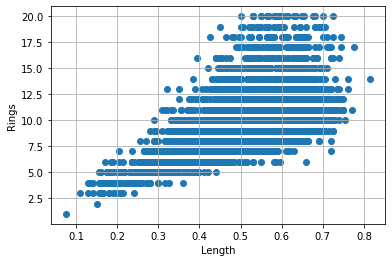

In [26]:
plt.scatter(x='Length',data=df,y='Rings')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [27]:
df.drop(df[(df['Length']>=0.8) & (df['Rings'] <25)].index,inplace=True,axis=0)
df.drop(df[df.Length<0.1].index,axis=0,inplace=True)

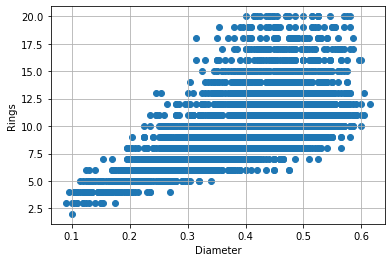

In [28]:
plt.scatter(x='Diameter',data=df,y='Rings')
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [29]:
df.drop(df[(df.Diameter>0.6) | (df.Diameter<0.1)].index,axis=0,inplace=True)
df.drop(df[(df.Diameter<0.3) & (df.Rings>=12.5)].index,axis=0,inplace=True)

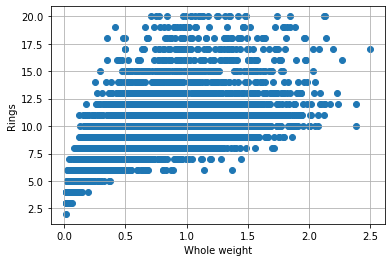

In [30]:
plt.scatter(x='Whole weight',y='Rings',data=df )
plt.xlabel('Whole weight')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [31]:
df.drop(df[(df['Whole weight']>2.0)&(df.Rings<25)].index,axis=0,inplace=True)

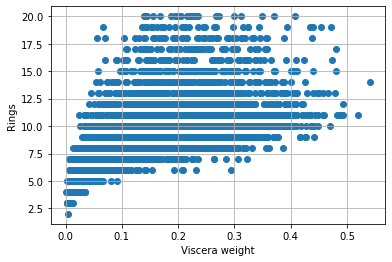

In [32]:
plt.scatter(x='Viscera weight',y='Rings',data=df )
plt.xlabel('Viscera weight')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [33]:
df.drop(df[(df['Viscera weight']>=0.425) & (df.Rings<20)].index,axis=0,inplace=True)

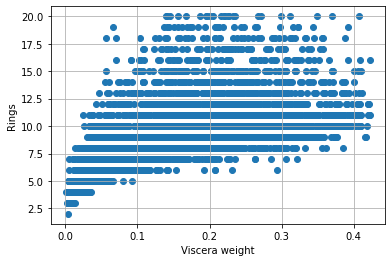

In [34]:
plt.scatter(x='Viscera weight',y='Rings',data=df )
plt.xlabel('Viscera weight')
plt.ylabel('Rings')
plt.grid()
plt.show()

In [35]:
df.drop(df[(df['Viscera weight']<0.1) & (df.Rings>15)].index , axis=0,inplace=True)

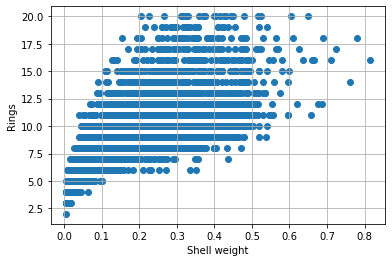

In [36]:
plt.scatter(data=df,x='Shell weight',y='Rings')
plt.grid()
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.show()

In [37]:
df.drop(df[(df['Shell weight']<0.20) & (df.Rings>17.5)].index,axis=0,inplace=True)
df.drop(df[(df['Shell weight']>=0.55) & (df.Rings>2)].index,axis=0,inplace=True)

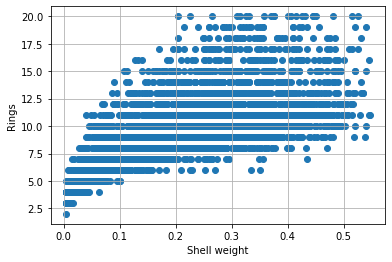

In [42]:
plt.scatter(data=df,x='Shell weight',y='Rings')
plt.grid()
plt.xlabel('Shell weight')
plt.ylabel('Rings')
plt.show()

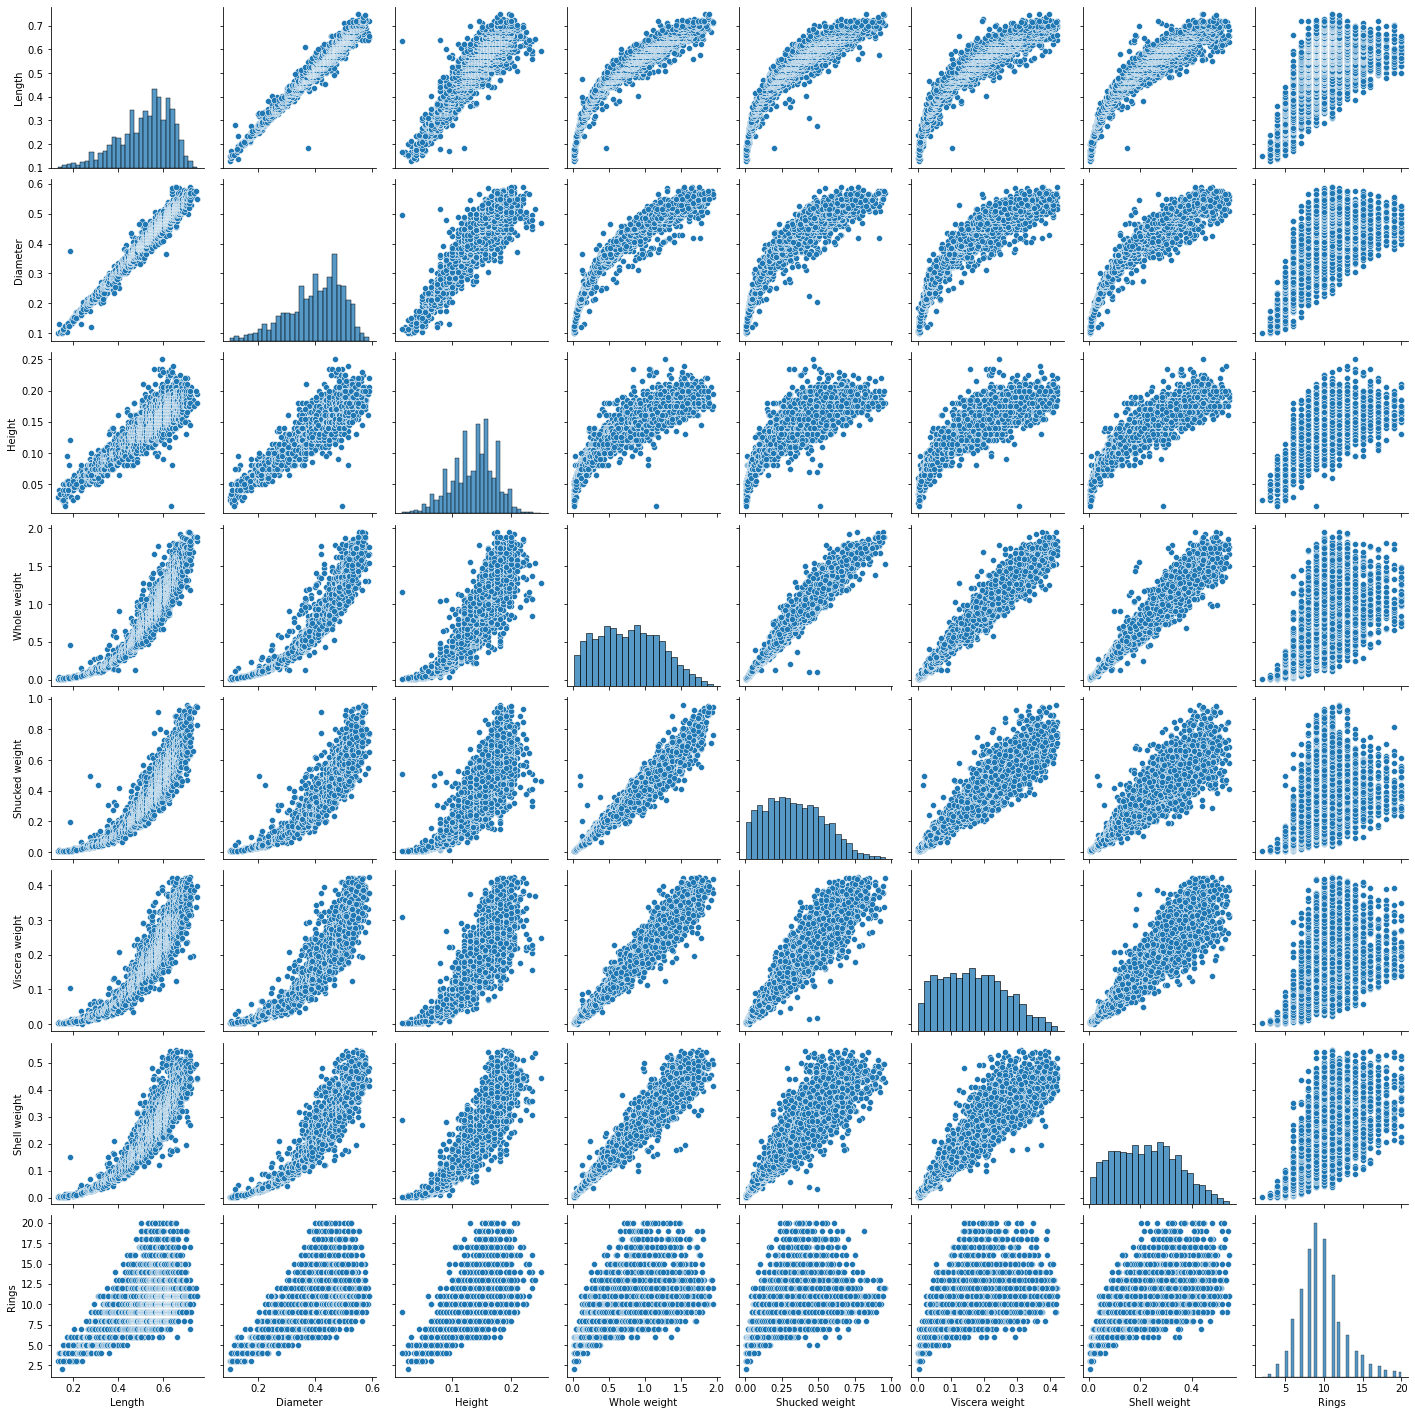

In [43]:
sns.pairplot(df)

In [38]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.025,5
1,F,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.035,6
2,F,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.040,5
3,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
4,F,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.048,7


In [39]:
df.Sex.replace({'F':0,'I':1,'M':2},inplace=True)

In [40]:
x1=df.iloc[:,:-1]
y1=df.iloc[:,-1]

In [44]:
df2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.275,0.195,0.070,0.0800,0.0310,0.0215,0.025,5
1,0,0.290,0.210,0.075,0.2750,0.1130,0.0675,0.035,6
2,0,0.290,0.225,0.075,0.1400,0.0515,0.0235,0.040,5
3,0,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
4,0,0.305,0.230,0.080,0.1560,0.0675,0.0345,0.048,7
...,...,...,...,...,...,...,...,...,...
4131,2,0.720,0.565,0.200,1.7870,0.7180,0.3850,0.529,11
4133,2,0.720,0.570,0.200,1.8275,0.9190,0.3660,0.485,10
4149,2,0.735,0.570,0.175,1.8800,0.9095,0.3870,0.488,11
4161,2,0.745,0.575,0.200,1.8840,0.9540,0.3360,0.495,12


In [50]:
from imblearn.over_sampling import RandomOverSampler
Randomsampler=RandomOverSampler()
x,y=Randomsampler.fit_resample(x1,y1)

In [51]:
df2=pd.concat([x,y],axis=1)

In [56]:
df2.to_csv('oversampled.csv')

In [60]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]


In [50]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split ,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report

In [51]:
models=[('Logistic Regression',LogisticRegression()),
        ('Decision Tree',DecisionTreeClassifier()),
        ('Support Vector ',SVC()),
        ('Nearest Neighbors',KNeighborsClassifier()),
        ('Random Forest ',RandomForestClassifier()),
        ('AdaBoostClassifier',AdaBoostClassifier()),
        ('Gradient Boosting',GradientBoostingClassifier()),
        ('Xtreame Gradient Boosting',XGBClassifier())
    
]

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=.30,stratify=y)

In [53]:
accuracy=[]

for name,model in models:
    
    print(name,'  :--  ')
    print()
    model.fit(xtrain,ytrain)
    print()
    ypred=model.predict(xtest)
    print()

    print(classification_report(ytest,ypred))
    accuracy.append(accuracy_score(ytest,ypred))

Logistic Regression   :--  



              precision    recall  f1-score   support

           2       0.52      1.00      0.68       205
           3       0.49      0.23      0.32       205
           4       0.50      0.46      0.48       205
           5       0.42      0.38      0.40       204
           6       0.28      0.35      0.31       205
           7       0.24      0.30      0.26       205
           8       0.17      0.32      0.22       205
           9       0.20      0.23      0.22       205
          10       0.22      0.07      0.10       205
          11       0.20      0.36      0.25       205
          12       0.08      0.04      0.06       205
          13       0.00      0.00      0.00       205
          14       0.11      0.07      0.09       205
          15       0.09      0.07      0.08       205
          16       0.20      0.06      0.09       205
          17       0.17      0.14      0.15       205
          18       0.18      0.21      0.19       

[21:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       205
           3       1.00      1.00      1.00       205
           4       1.00      1.00      1.00       205
           5       0.96      1.00      0.98       204
           6       0.79      0.85      0.82       205
           7       0.67      0.70      0.68       205
           8       0.48      0.45      0.47       205
           9       0.29      0.24      0.26       205
          10       0.41      0.35      0.38       205
          11       0.66      0.55      0.60       205
          12       0.75      0.88      0.81       205
          13       0.91      0.93     

In [54]:
accuracy

[0.2583461736004109,
 0.8366718027734977,
 0.2794042116076014,
 0.7231638418079096,
 0.8394966615305598,
 0.1335387776065742,
 0.7298407806882383,
 0.8387262455059066]

In [55]:
print('the mean accuracy of the model  :--  ',np.array(accuracy).mean()*100)

the mean accuracy of the model  :--   57.989856189008734


In [56]:
skf=StratifiedKFold(n_splits=5)
skf.get_n_splits(x,y)

5

In [57]:
accuracy=[]

for train,test in skf.split(x,y):
    xtrain,xtest=x[train],x[test]
    ytrain,ytest=y[train],y[test]
    
    
    Random=RandomForestClassifier()
    Random.fit(xtrain,ytrain)
    ypred=Random.predict(xtest)
    accuracy.append(accuracy_score(ytest,ypred))

In [58]:
accuracy

[0.7989214175654854,
 0.8058551617873652,
 0.8393063583815029,
 0.8554913294797688,
 0.9109826589595376]

In [59]:
from sklearn.feature_selection import VarianceThreshold
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=.30,stratify=y)

In [60]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(xtrain)

VarianceThreshold(threshold=0)

In [61]:
# here we can see that all values are important for the dependent variable
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [62]:
Random.feature_importances_

array([0.03543195, 0.11252191, 0.12512434, 0.10912264, 0.15580537,
       0.1601922 , 0.14504645, 0.15675514])

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [64]:
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

In [65]:
n_estimators=[int(x)  for x in np.linspace (start=200 ,stop=2000,num=10)]

max_features=['auto','sqrt','log2']

max_depth=[int(x) for x in np.linspace(10,1000,10)]

min_samples_split=[2,5,10,14]

min_samples_leaf=[1,2,4,6,8]

In [66]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [67]:
rf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,n_jobs=-1,random_state=100)

rf_randomcv.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [68]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [75]:
Random=RandomForestClassifier(n_estimators= 600,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 120,
 criterion= 'entropy'
)
Random.fit(xtrain,ytrain)
ypred=Random.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       205
           3       1.00      1.00      1.00       205
           4       1.00      1.00      1.00       205
           5       0.94      1.00      0.97       205
           6       0.82      0.88      0.85       205
           7       0.63      0.69      0.66       205
           8       0.52      0.46      0.49       205
           9       0.32      0.25      0.28       205
          10       0.42      0.33      0.37       205
          11       0.64      0.60      0.61       205
          12       0.82      0.89      0.85       204
          13       0.88      0.94      0.91       205
          14       0.94      1.00      0.97       205
          15       0.94      1.00      0.97       205
          16       0.95      1.00      0.97       205
          17       0.99      1.00      0.99       205
          18       1.00      1.00      1.00       205
          19       0.99    

In [76]:
import pickle 
import requests

In [78]:
pickle.dump(Random, open('RandomForest.pkl','wb'))

In [80]:
model = pickle.load(open('RandomForest.pkl','rb'))


[11]
